In [1]:
import scipy.io as sio  
import pandas as pd
import numpy as np
from six import StringIO
import scipy.optimize as optimize
import matplotlib.pyplot as plt
# import math
from numpy import mean,sum,array
import warnings
warnings.filterwarnings("ignore")

1.异常检测

In [3]:
# -*- coding:utf-8 -*-
import sys
sys.path.append('../../')
%matplotlib inline
stdout = sys.stdout
import JSONData.tdx_data_Day as tdd
from ipykernel.iostream import OutStream
if isinstance(stdout,OutStream):
    sys.stdout = stdout
else:
    raise "no OutStream:%s"%(sys.stdout)
from  JSONData import sina_data 
import pandas as pd
# mpl.rcParams['font.sans-serif'] = ['STHeiti']
# mpl.rcParams['axes.unicode_minus'] = False
#中文字体显示  
import matplotlib.pyplot as plt
plt.ion()
plt.rc('font', family='SimHei', size=13)
from IPython.core.pylabtools import figsize
figsize(8, 5)
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# df = tdd.get_tdx_Exp_day_to_df('999999',start=20180502,end=None).sort_index(ascending=True)
# print df.shape
# dates = [i.replace('-','') for i in df.index.tolist()]
# prices = df.close.apply(lambda x:round(x,2)).tolist()

读取数据...
异常检测样本数据可视化……
date
2018-02-28    28.04
2018-02-27    29.09
Name: high, dtype: float64


Text(0, 0.5, '吞吐量 (mb/s)')

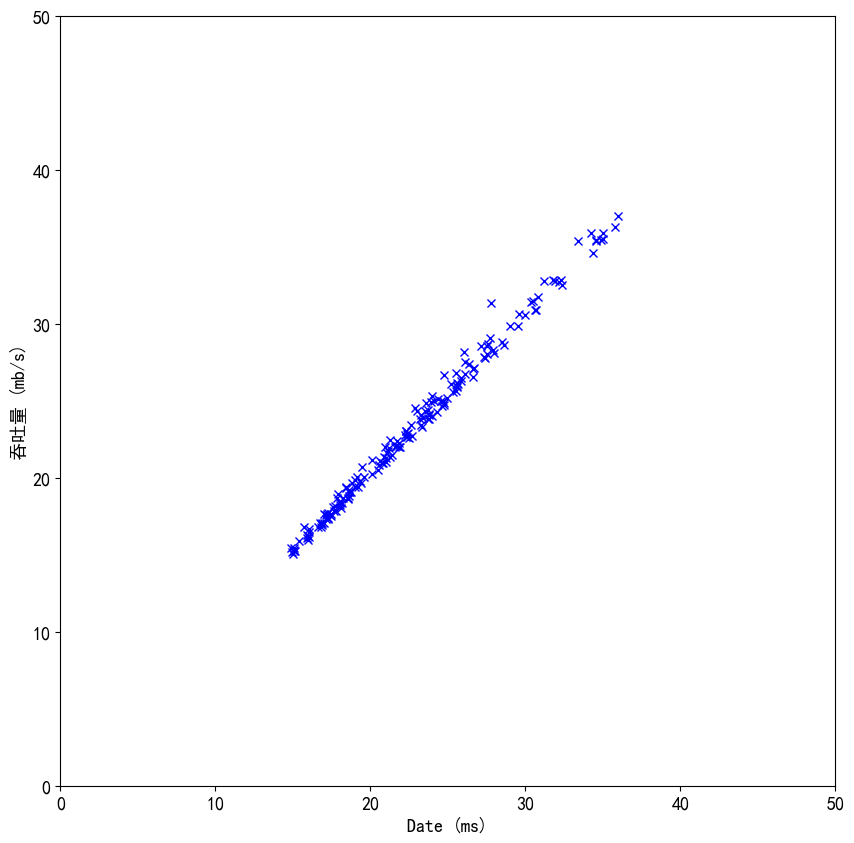

In [5]:
print('读取数据...')
# body=read_file("Machine Learning/ex8data1.mat")
# data=sio.loadmat(StringIO(body))
start = '2017-06-05'
end = '2018-02-28'
startv = '2018-02-28'
endv = '2018-04-01'
startv2 = '2018-04-01'
endv2 = '2018-05-01'

code = '000002'
# code_n = '300400.XSHE'
# code_n = '601608.XSHG'
data = tdd.get_tdx_Exp_day_to_df(code, start=start, end=end).loc[:,['close','high']]
datav = tdd.get_tdx_Exp_day_to_df(code, start=startv, end=endv).loc[:,['close','high']]
datav2 = tdd.get_tdx_Exp_day_to_df(code, start=startv2, end=endv2).loc[:,['close','high']]
# x = np.random.randn(100)
# 训练集
X = data
# 验证集
Xval = datav
yval = datav2

print('异常检测样本数据可视化……')
# 绘图
fig = plt.figure(figsize=(10,10))  
fig.set_facecolor('white')
ax = fig.add_subplot(111)
print(X.iloc[:,1][:2])
ax.plot(X.iloc[:,0], X.iloc[:,1], 'bx') # 蓝点
ax.axis([0,50,0,50]) # 限制显示范围
ax.set_xlabel('Date (ms)')
ax.set_ylabel('吞吐量 (mb/s)')


2.均值和方差

In [6]:
# 计算均值和方差
from IPython.core.debugger import Tracer
def estimateGaussian(X):
    m,n = X.shape
#     m = len(X)
    # 均值
    mu = mean(X,axis = 0)
    # 方差
    
#     Tracer()() #this one triggers the debugger
    sigma2 = 1.0*sum((X - mu)**2,axis=0)/m
    
    return mu,sigma2
#多元高斯分布计算
def multivariateGaussian(X, mu, sigma2):
    # 训练集数量和特征数量
    m,n = X.shape
#     import ipdb;ipdb.set_trace()
#     m = len(X)
    # 协方差矩阵（特例：对角矩阵情况）
    C = np.diag(sigma2)
    #C = 1.0/m*X.T.dot(X)
    C_det = np.linalg.det(C)
    # 协方差矩阵的逆矩阵
    C_inv = np.linalg.inv(C)
    
    # 结果
    if not isinstance(X,pd.DataFrame):
#         Tracer()()
#         X=pd.Panel(X)
        mu = mu.tolist()
    temp = sum((X-mu).dot(C_inv)*(X-mu),axis = 1)
    p = 1.0/((2.0*np.pi)**(n/2.0)*C_det**(1.0/2))*np.e**(-1.0/2*temp)
    
    return p

In [7]:
# 绘图：轮廓图
def visualizeFit(X,  mu, sigma2):
    
    xnums = np.arange(0,35.5,0.5)
    X1,X2 = np.meshgrid(xnums,xnums)
#     print X1.flatten(),X2.flatten()

    tempX = np.c_[X1.flatten(),X2.flatten()]
#     print "tempX:",tempX,len(tempX),mu,sigma2
#     Tracer()()
    Z = multivariateGaussian(tempX,mu,sigma2)
    Z = Z.reshape(X1.shape)
#     print "X1.shape",X1.shape
#     Z = Z[:len(X1)].reshape(X1.shape)
#     Z = Z[:len(X1)].reshape(len(X1),1)
    
#     Z = Z[:len(X1)].reshape(1,-1)
    

    # 指数数组
    index = -np.arange(-20,0,3)
    myrange = array([np.power(10**(-1),index)]).T
    
    fig = plt.figure(figsize=(10,10))  
    fig.set_facecolor('white')
    ax = fig.add_subplot(111)
    ax.plot(X.iloc[:,0], X.iloc[:,1], 'bx')
    ax.axis([0,50,0,50])
    ax.set_xlabel('延迟 (ms)')
    ax.set_ylabel('吞吐量 (mb/s)')
#     Tracer()()
    # 轮廓图
#     Z1 = np.array(Z[:len(X1)].values)
    ax.contour(X1, X2,Z , np.power(10**(-1),index))
    
    return ax
    

高斯拟合结果……
close    22.771798
high     23.339944
dtype: float64 close    28.003798
high     30.037897
dtype: float64
date
2018-02-28    0.005488
2018-02-27    0.005488
dtype: float64


<AxesSubplot:xlabel='延迟 (ms)', ylabel='吞吐量 (mb/s)'>

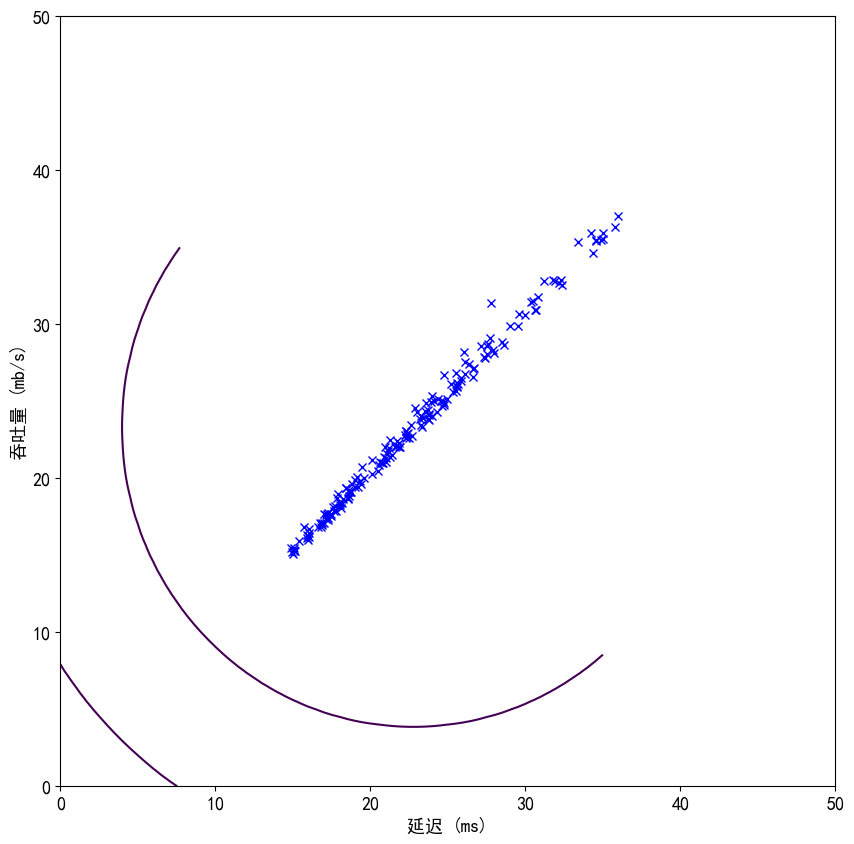

In [10]:
print('高斯拟合结果……')
# 均值与方差
mu,sigma2 = estimateGaussian(X)
# 训练集
print(mu,sigma2)
p = multivariateGaussian(X, mu, sigma2)
print(p[:2])
visualizeFit(X,  mu, sigma2)